<a href="https://colab.research.google.com/github/kyungjin96/test_ml/blob/main/ml_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val  # 값 복원
        it.iternext()
    return grad

In [ ]:
class TwoLayerNet:
    """
    params : 신경망의 매개변수를 보관하는 딕셔너리 변수.
    params['W1']은 1번째 층의 가중치, params['b1']은 1번째 층의 편향.
    params['W2']은 2번째 층의 가중치, params['b2']은 2번째 층의 편향.
    grad : 기울기를 보관하는 딕셔너리 변수(numerical_gradient()의 반환값)
    grads['W1']은 1번째 층의 가중치의 기울기, grads['b1']은 1번째 층의 편향의 기울기.
    grads['W2']은 2번째 층의 가중치의 기울기, grads['b2']은 2번째 층의 편향의 기울기.
    """
    # 초기화를 수행한다.
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    # 예측(추론)을 수행한다.
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        #sigmoid 활성화함수
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
       
        # softmax y의 확률값 
        return y

    # 손실 함수의 값을 구한다.
    # x : 입력데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        #결과의 확률값과 원핫인코딩된 값을 비교
        return cross_entropy_error(y, t)

    # 정확도를 구한다.
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # 가중치 매개변수의 기울기를 구한다.
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads
    '''   '''
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        #print(x.shape)
        #print(W1.shape)
        #print(b1.shape)
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads    

In [ ]:
import numpy as np
import torch


net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

print(net.params['W1'].shape)  # (784, 100)
print(net.params['b1'].shape)  # (100,)
print(net.params['W2'].shape)  # (100, 10)
print(net.params['b2'].shape)  # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


In [ ]:
x = np.random.rand(100, 784)  # 더미 입력 데이터(100장 분량)
y = net.predict(x)
print(y.shape)

(100, 10)


In [ ]:
x = np.random.rand(100, 784)  # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10)   # 더미 정답 레이블(100장 분량)

grads = net.numerical_gradient(x, t)  # 기울기 계산
    # 주의 : 실행하는데 아주 오래걸림
    # 나중에 표시 필요
print(grads['W1'].shape)  # (784, 100)
print(grads['b1'].shape)  # (100,)
print(grads['W2'].shape)  # (100, 10)
print(grads['b2'].shape)  # (10,)

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

(x_train, t_train), (x_test, t_test) = tf.keras.datasets.mnist.load_data()
t_train=tf.keras.utils.to_categorical(t_train)
t_test=tf.keras.utils.to_categorical(t_test)
x_train=x_train.reshape(60000,-1)
x_test=x_test.reshape(10000,-1)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

# 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()                   # 위
#plt.legend(loc='lower right') # 아래
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


train acc, test acc | 0.18576666666666666, 0.195


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


train acc, test acc | 0.8518666666666667, 0.8545
train acc, test acc | 0.8499166666666667, 0.8521
train acc, test acc | 0.8642666666666666, 0.8718
train acc, test acc | 0.8580333333333333, 0.8654
train acc, test acc | 0.8556833333333334, 0.8632
train acc, test acc | 0.8595, 0.8604
train acc, test acc | 0.8704833333333334, 0.8724
train acc, test acc | 0.8527, 0.8575
train acc, test acc | 0.86335, 0.8664
train acc, test acc | 0.86675, 0.8687
train acc, test acc | 0.8494666666666667, 0.852
train acc, test acc | 0.8735333333333334, 0.8777
train acc, test acc | 0.8768, 0.8841
train acc, test acc | 0.8691, 0.876
train acc, test acc | 0.8793666666666666, 0.8863
train acc, test acc | 0.8704666666666667, 0.8778



훈련데이터와 시험 데이터에 대한 정확도 추이


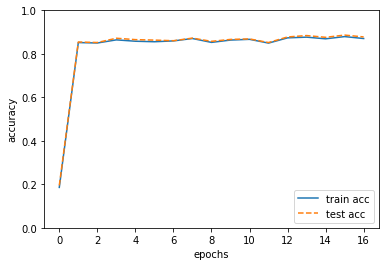

In [ ]:
import tensorflow as tf
(x_train, t_train), (x_test, t_test) = tf.keras.datasets.mnist.load_data()
t_train=tf.keras.utils.to_categorical(t_train)
t_test=tf.keras.utils.to_categorical(t_test)
x_train=x_train.reshape(60000,-1)
x_test=x_test.reshape(10000,-1)


network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

print("\n\n\n훈련데이터와 시험 데이터에 대한 정확도 추이")
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()  #acc 값 보여주기 